In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
print(trainset)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
print(trainloader)

Dataset MNIST
    Number of datapoints: 60000
    Root location: C:\Users\paras/.pytorch/MNIST_data/
    Split: Train


In [8]:
# 1 method using softmax 
#build a feedforward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10))

#define the loss
criterian = nn.CrossEntropyLoss()



#Get our data
images, labels = next(iter(trainloader)) #labels denote at which the image 
print(images.shape)
print(labels.shape)

#Flatten images
images = images.view(images.shape[0], -1)  #changing the size of image ,image is in form [64 (images), 1[color], 784(28 *28)]
print(images.shape)


#forward pass, get our logits
logits = model(images)

#clculate the loss with logits nd labels
loss = criterian(logits, labels)
print(loss)


                      

torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 784])
tensor(2.2974, grad_fn=<NllLossBackward>)


In [2]:
 # or 2 method using log softmax 

In [4]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim =1))
#define the loss
criterian = nn.NLLLoss()

#Get our data
images, labels = next(iter(trainloader)) #labels denote at which the image 
print(images.shape)
print(labels.shape)

#Flatten images
images = images.view(images.shape[0], -1)  #changing the size of image ,image is in form [64 (images), 1[color], 784(28 *28)]
print(images.shape)


#forward pass, get our logits
logps = model(images)

#clculate the loss with logits nd labels
loss = criterian(logps, labels)
print(loss)

torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 784])
tensor(2.2857, grad_fn=<NllLossBackward>)


In [4]:
#here we will do processo f bacpropagation
print('before backward pass: \n ', model[0].weight.grad)
loss.backward()
print('after backward pass: \n', model[0].weight.grad)


before backward pass: 
  None
after backward pass: 
 tensor([[ 1.9575e-03,  1.9575e-03,  1.9575e-03,  ...,  1.9575e-03,
          1.9575e-03,  1.9575e-03],
        [ 2.6624e-04,  2.6624e-04,  2.6624e-04,  ...,  2.6624e-04,
          2.6624e-04,  2.6624e-04],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        ...,
        [ 2.0136e-03,  2.0136e-03,  2.0136e-03,  ...,  2.0136e-03,
          2.0136e-03,  2.0136e-03],
        [ 2.4571e-03,  2.4571e-03,  2.4571e-03,  ...,  2.4571e-03,
          2.4571e-03,  2.4571e-03],
        [-6.1449e-05, -6.1449e-05, -6.1449e-05,  ..., -6.1449e-05,
         -6.1449e-05, -6.1449e-05]])


In [2]:
from torch import optim



In [3]:
# method for training the model

In [4]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim =1))
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.003)

epochs = 5   #for every pass we useas epoch
for e in range(epochs):
    runinng_loss = 0
    for images, labels in trainloader:
        #flatten MNIST images into 784 long vector
        images = images.view(images.shape[0], -1) 
        
        # TODO : training pass
        optimizer.zero_grad()
        
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        runinng_loss += loss.item()
    else:
        print(f"taining loss: {runinng_loss/len(trainloader)}")
        
        

taining loss: 1.8655547214977777
taining loss: 0.811472352570308
taining loss: 0.520600966108379
taining loss: 0.43376977393812716
taining loss: 0.39183713136705506


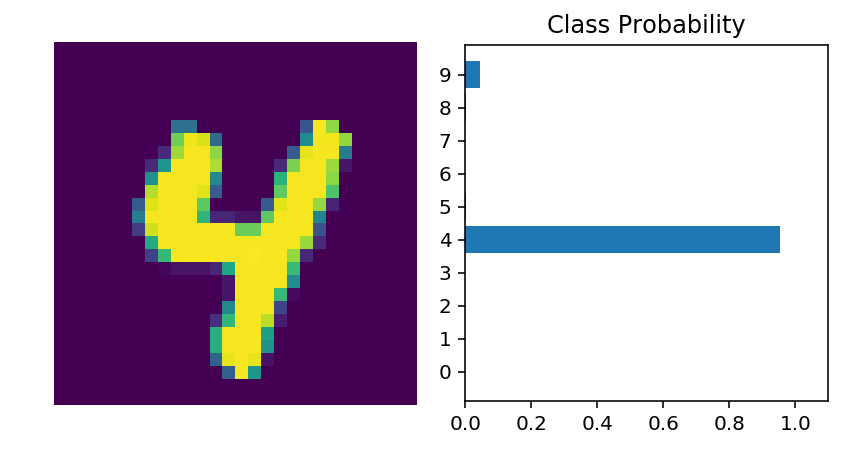

In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import hillo


images, labels = next(iter(trainloader))

img = images[63].view(1,784)
#turn off gradient to sppped  up this part
with torch.no_grad():
    logits = model.forward(img)
    
ps = F.softmax(logits, dim= 1)
hillo.view_classify(img.view(1,28,28), ps)